# Preliminaries

## Imports

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from neural_network import NeuralNet

## Auxiliary Functions

In [395]:
colour_map = 'rainbow'

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def regression_error(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def plot(X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=colour_map)
    plt.show()

def plot2D(X, Y):
    plt.scatter(X, Y)
    plt.show()

def plot3D(X, Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], Y)
    plt.show()

def draw_confusion_matrix(Y, P):
    ConfusionMatrixDisplay(confusion_matrix(Y, P)).plot()
    plt.show()

def draw_decision_boundaries(X, Y, model):
    xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1), np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1))
    r1, r2 = xx.flatten(), yy.flatten()
    
    grid = np.hstack((r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))))
    
    preds = model.predict(grid)
    
    zz = preds.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, alpha=0.3, cmap=colour_map)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=colour_map)
    plt.show()

def draw_best_fit_2D(X, Y, model):
    X_prime = np.linspace(X.min() - 1, X.max() + 1, 1000).reshape((1000, 1))
    preds = model.predict(X_prime)
    plt.scatter(X, Y)
    plt.plot(X_prime, preds, c='red')
    plt.show()

def draw_best_fit_3D(X, Y, model):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xRange = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    yRange = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
    xx, yy = np.meshgrid(xRange, yRange)
    r1, r2 = xx.flatten(), yy.flatten()
    
    grid = np.hstack((r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))))
    preds = model.predict(grid).reshape(-1)
    
    ax.plot_trisurf(grid[:, 0], grid[:, 1], preds, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], Y)
    plt.show()

# Classification

## Gaussian Clouds

### Data

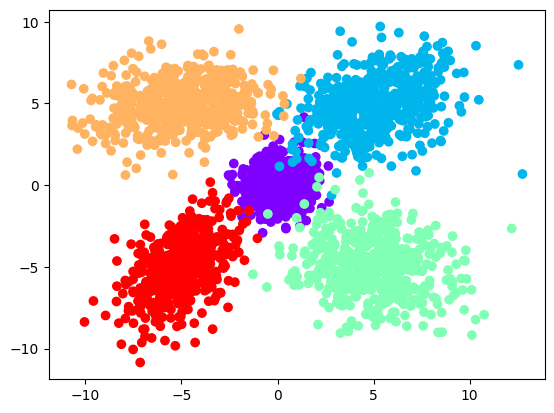

In [396]:
class_size = 500
K = 5

mean = [[0, 0], [5, 5], [5, -5], [-5, 5], [-5, -5]]
cov = [[[1, 0], [0, 1]], [[4, 1], [1, 3]], [[4, -0.5], [-0.5, 3]], [[5, 0.5], [0.5, 2]], [[2, 1], [1, 3]]]

X = np.vstack([np.random.multivariate_normal(mean[i], cov[i], class_size) for i in range(K)])
Y = np.hstack([i * np.ones(class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Training

In [397]:
ann = NeuralNet((20, 20, 20))

ann.train(X, T, num_epochs=2000)

predictions = ann.predict(X)

### Results

Accuracy: 0.9856


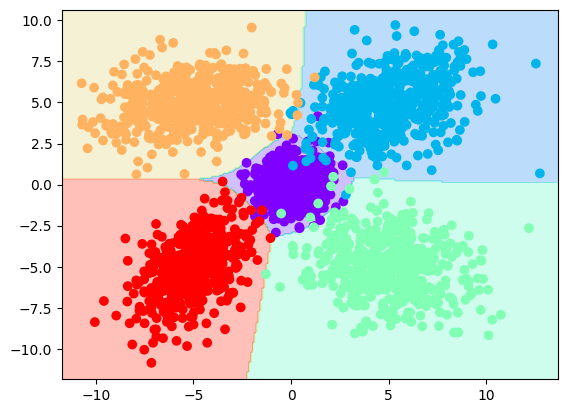

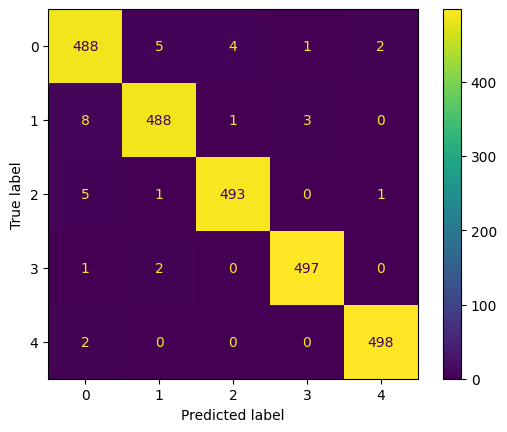

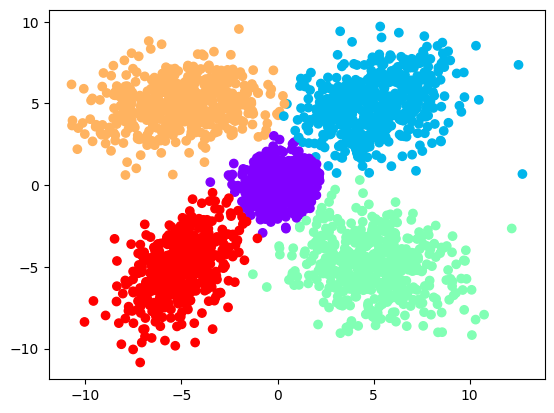

In [398]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)

## Donut

### Data

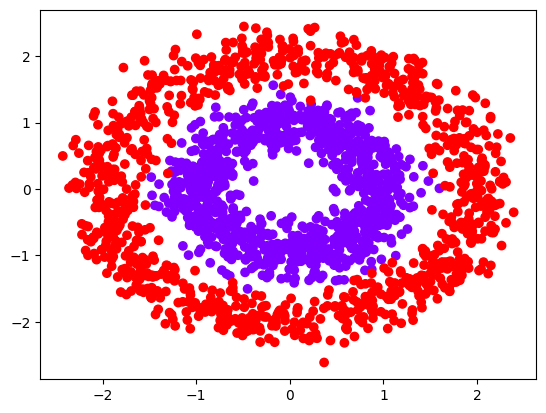

In [399]:
class_size = 1000
K = 2

r1 = np.random.normal(1, 0.2, class_size)
r2 = np.random.normal(2, 0.2, class_size)
theta1 = np.linspace(0, 2 * np.pi, class_size) + np.random.normal(0, 0.5, class_size)
theta2 = np.linspace(0, 2 * np.pi, class_size) + np.random.normal(0, 0.5, class_size)
X1 = np.vstack([r1 * np.cos(theta1), r1 * np.sin(theta1)])
X2 = np.vstack([r2 * np.cos(theta2), r2 * np.sin(theta2)])

X = np.hstack([X1, X2]).T
Y = np.hstack([i * np.ones(class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Training

In [400]:
Z = Y.reshape((len(Y), 1))

ann = NeuralNet((10, 10), 'tanh', output_activation_function='sigmoid', learning_rate=1e-4)

ann.train(X, Z, num_epochs=1000)

predictions = ann.predict(X)

### Results

Accuracy: 0.987


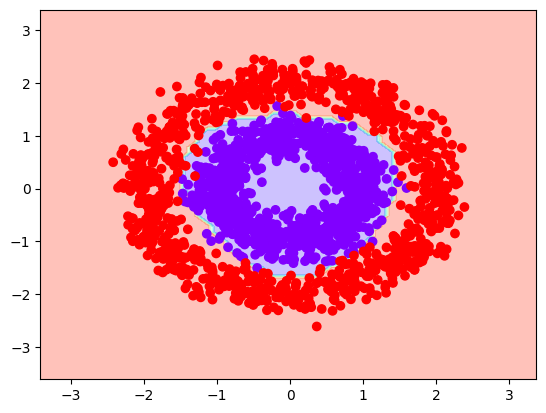

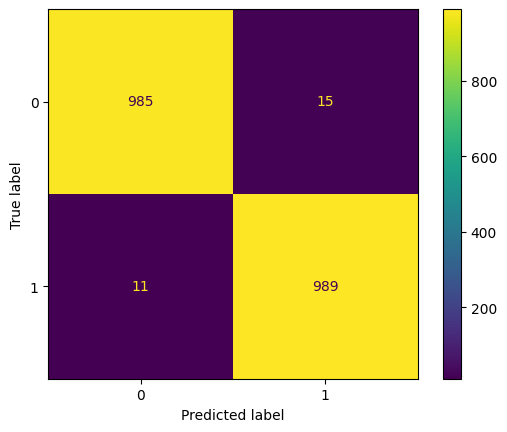

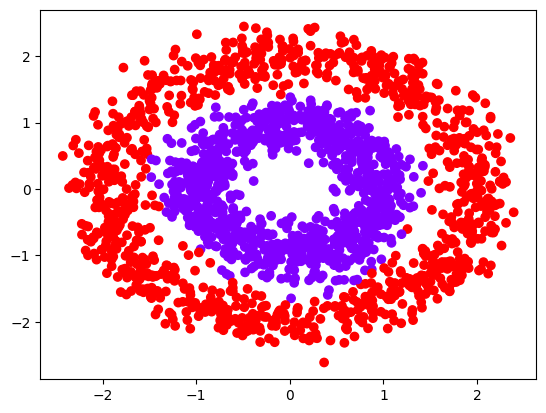

In [401]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)

## XOR

### Data

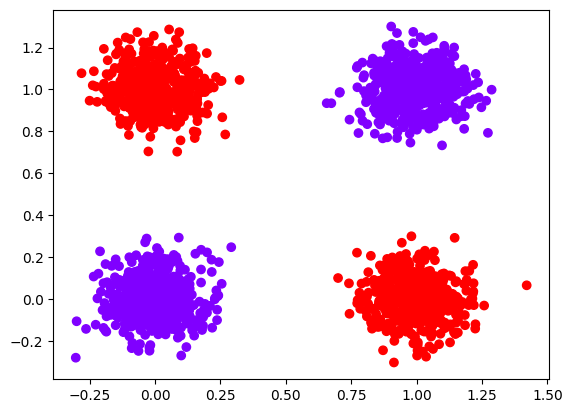

In [402]:
class_size = 500
K = 2

mean = [[0, 0], [0, 1], [1, 1], [1, 0]]
cov = [[0.01, 0], [0, 0.01]]

X = np.vstack([np.vstack([np.random.multivariate_normal(mean[i], cov, class_size), np.random.multivariate_normal(mean[i+2], cov, class_size)]) for i in range(K)])
Y = np.hstack([i * np.ones(2 * class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Training

In [403]:
ann = NeuralNet((10, 10, 10, 10), 'tanh', learning_rate=1e-4)

ann.train(X, T, num_epochs=2000)

predictions = ann.predict(X)

### Results

Accuracy: 1.0


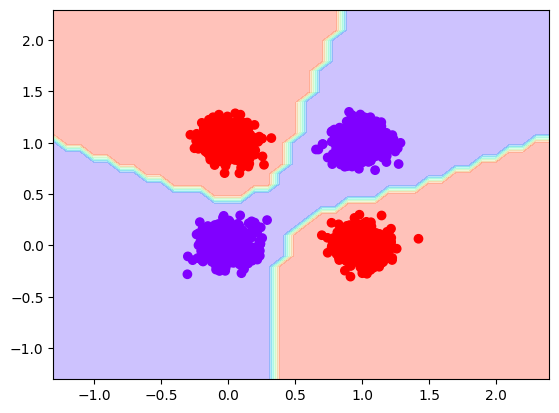

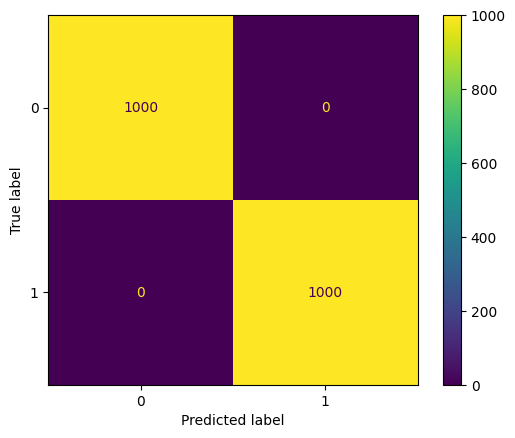

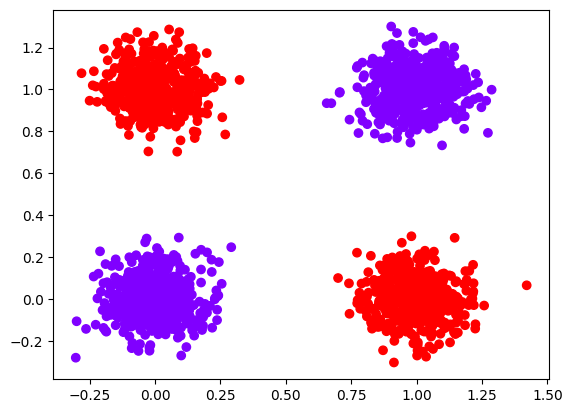

In [404]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)

## C Shapes

### Data

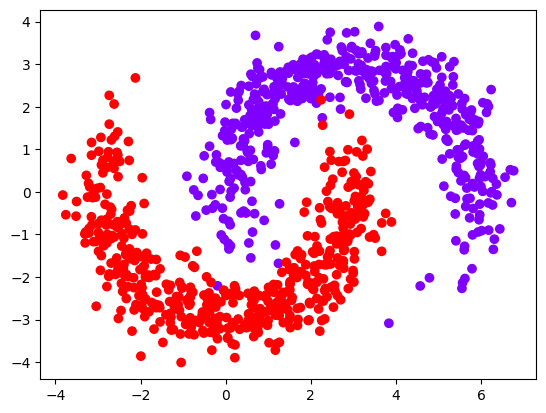

In [405]:
class_size = 500
K = 2

r1 = np.random.normal(3, 0.4, class_size)
r2 = np.random.normal(3, 0.4, class_size)
theta1 = np.linspace(0, np.pi, class_size) + np.random.normal(0, 0.5, class_size)
theta2 = np.linspace(np.pi, 2 * np.pi, class_size) + np.random.normal(0, 0.5, class_size)
X1 = np.vstack([r1 * np.cos(theta1) + 3, r1 * np.sin(theta1)])
X2 = np.vstack([r2 * np.cos(theta2), r2 * np.sin(theta2)])

X = np.hstack([X1, X2]).T
Y = np.hstack([i * np.ones(class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Predictions

In [406]:
ann = NeuralNet((10, 10, 10, 10), 'tanh', learning_rate=1e-4)

ann.train(X, T, num_epochs=2000)

predictions = ann.predict(X)

### Results

Accuracy: 0.996


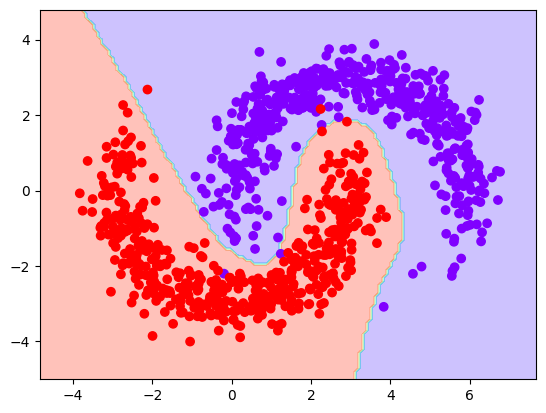

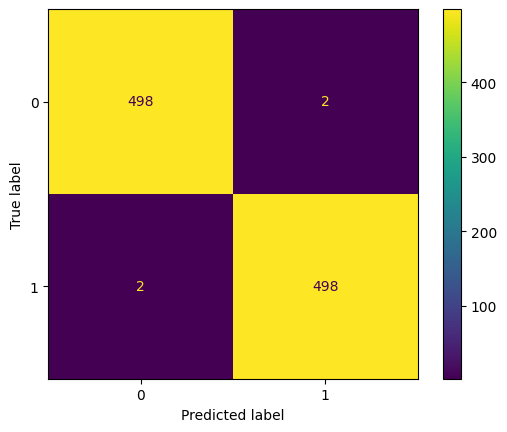

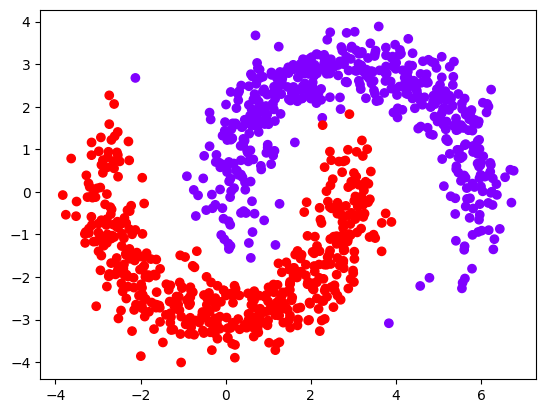

In [407]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)

# Regression

## Sine Wave

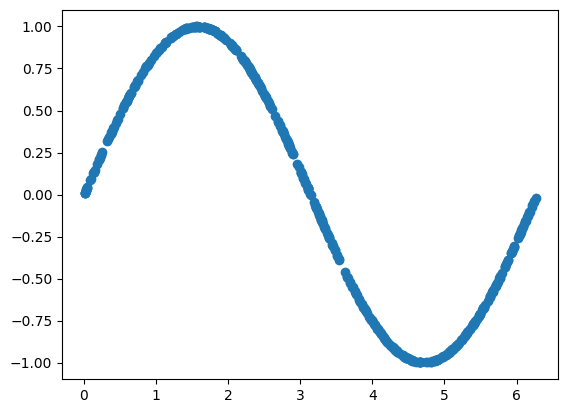

In [408]:
X = np.random.random((500, 1)) * 2* np.pi
Y = np.sin(X)

plot2D(X, Y)

### Training

In [409]:
ann = NeuralNet((50, 50, 5), 'tanh', output_activation_function='identity', learning_rate=1e-4)

ann.train(X, Y, num_epochs=5000)

predictions = ann.predict(X)

### Results

Accuracy: 0.9969189292302885


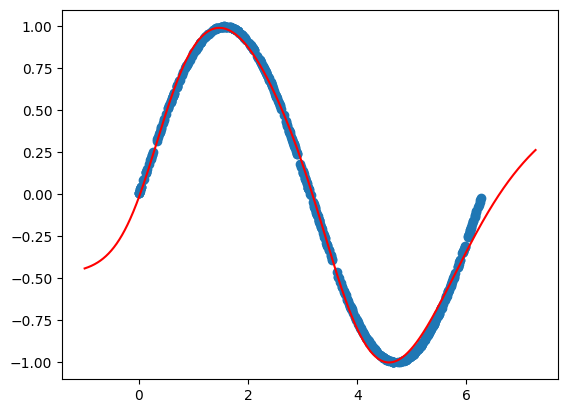

In [410]:
print('Accuracy:', r2_score(Y, predictions))

draw_best_fit_2D(X, Y, ann)

## 3D Saddle

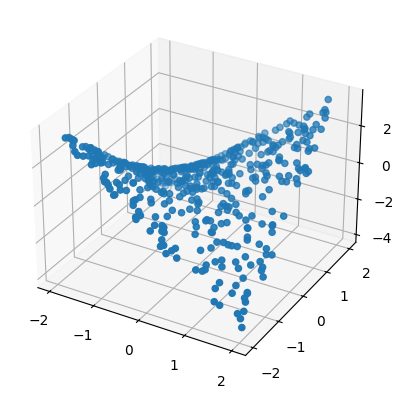

In [411]:
X = np.random.random((500, 2)) * 4 - 2
Y = (X[:, 0] * X[:, 1])
Y = Y.reshape((len(Y), 1))

plot3D(X, Y)

### Training

In [412]:
ann = NeuralNet((5, 5, 5), 'tanh', output_activation_function='identity', learning_rate=1e-4)

ann.train(X, Y, num_epochs=10000)

predictions = ann.predict(X)

### Results

Accuracy: 0.9981062491865644


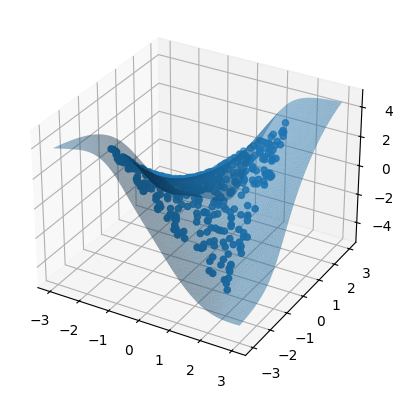

In [413]:
print('Accuracy:', r2_score(Y, predictions))

draw_best_fit_3D(X, Y, ann)